In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Choosing an estimator for a classification problem
1. If you have structured data, used ensemble methods
2. if you have unstructured data use deep learning or transfer learning
let's go to the map https://scikit-learn.org/stable/machine_learning_map.html

In [3]:
# import dataset
heart_disease = pd.read_csv("../../dataset/heart-disease.csv")

heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# get all independented variable
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

In [6]:
# import Algorithm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


np.random.seed(42)
# Split the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
# model = SVC(kernel="rbf") #0.6885245901639344
# model = LinearSVC(dual='auto', max_iter=5000) # 0.8688524590163934
model = RandomForestClassifier(n_estimators=1000) # 0.8688524590163934
# model = GaussianNB() # 0.8688524590163934
# model = XGBClassifier() # 0.819672131147541
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# model.score(X_test, y_test)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.8688524590163934
[[24  5]
 [ 3 29]]


In [7]:
# Visialize confution matrix with pd.crosstab()
pd.crosstab(y_test,
           y_pred,
           rownames=["Actual levels"],
           colnames=["Predicted Levels"])

Predicted Levels,0,1
Actual levels,,
0,24,5
1,3,29


**24 and 29 is True positive and True negative**

**3 False positive**

**5 False Negative**


In [9]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

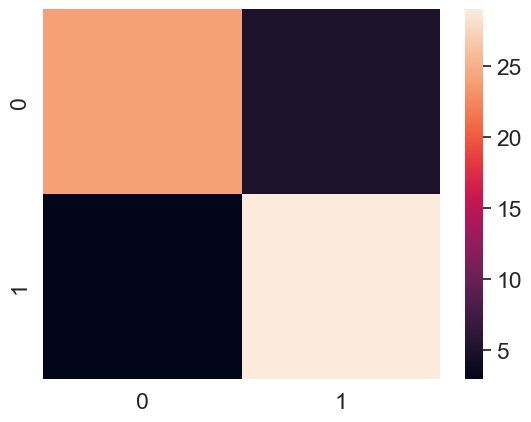

In [10]:
import seaborn as sns

# Set then font scale
sns.set(font_scale=1.5)

# Create confution matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat)


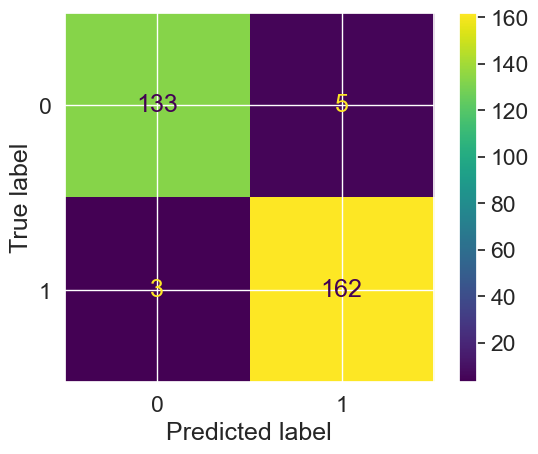

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);


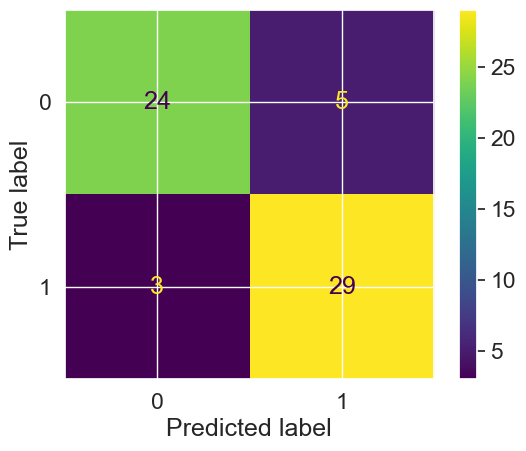

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);


In [13]:
print(confusion_matrix(y_test, y_pred))

[[24  5]
 [ 3 29]]


In [14]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [15]:
model.score(X_train, y_train)

1.0

In [16]:
model.score(X_test, y_test)

0.8688524590163934

In [17]:
model.predict_proba(X_test[:5])

array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ]])

In [18]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [19]:
single_score = model.score(X_test, y_test)

In [20]:
scores = cross_val_score(model, X, y, cv=5)

In [21]:
avg_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

In [22]:
print("Single score : ", single_score)
print("Avg score :", avg_cross_val_score)

Single score :  0.8688524590163934
Avg score : 0.8182513661202186


In [84]:
print(f"Heart disease classifier cross validated accuracy: {avg_cross_val_score * 100:.2f}%")

Heart disease classifier cross validated accuracy: 81.83%


 ## Cross Validation and Scroling Parameter


In [96]:
# Cross Validation Score for accuracy
cv_acc = cross_val_score(model, X, y, cv=10, scoring="accuracy")
cv_acc

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.76666667, 0.83333333, 0.73333333, 0.8       ])

In [100]:
print(f"Heart disease classifier cross validated accuracy: {np.mean(cv_acc) * 100:.2f}%")

Heart disease classifier cross validated accuracy: 83.15%


In [111]:
# Precision
cv_precision = cross_val_score(model, X, y, cv=10, scoring="precision")
cv_precision


array([0.85      , 0.82352941, 0.83333333, 0.9375    , 0.85      ,
       0.92307692, 0.75      , 0.78947368, 0.7       , 0.82352941])

In [115]:
print(f"Heart disease classifier cross validated Precisoon Accuracy: {np.mean(cv_precision) * 100:.2f}%")

Heart disease classifier cross validated Precisoon Accuracy: 82.80%


In [118]:
cv_recall = cross_val_score(model, X, y, cv=10, scoring="recall")
cv_recall

array([1.        , 0.82352941, 0.88235294, 0.88235294, 1.        ,
       0.8125    , 0.75      , 0.9375    , 0.875     , 0.875     ])

In [124]:
print(f"Heart disease classifier cross validate Recall is: {np.mean(cv_recall)*100 :.2f}%")

Heart disease classifier cross validate Recall is: 88.38%


# For regression

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

## Classification model evaluation metrics

* Accuracy
* Area under ROC curve
* Confusion Matrix
* Classification Report

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

**ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate(FPR)**

* True Positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negetive  = model predicts 0 when truth is 0
* False negetive = model predicts 0 when truth is 1

**TPR = True Positives (TP) / True Positives (TP) + False Negatives (FN)**

**FPR = False Positives (FP) / False Positives (FP) +  True Negatives (TN)**
​
* Y-Axis (TPR)
* X-Axis (FPR)


In [25]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)

y_probs[:10]



array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ],
       [0.145, 0.855],
       [0.286, 0.714],
       [0.948, 0.052],
       [0.967, 0.033],
       [0.471, 0.529]])

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_probs.shape

(61, 2)

In [28]:
y_pred = y_pred.reshape(61, 1)

In [29]:
y_pred.shape

(61, 1)

In [30]:
print(np.concatenate((y_probs[:10], y_pred[:10]), 1))

[[0.894 0.106 0.   ]
 [0.435 0.565 1.   ]
 [0.455 0.545 1.   ]
 [0.871 0.129 0.   ]
 [0.23  0.77  1.   ]
 [0.145 0.855 1.   ]
 [0.286 0.714 1.   ]
 [0.948 0.052 0.   ]
 [0.967 0.033 0.   ]
 [0.471 0.529 1.   ]]


In [31]:
y_probs[:10]

array([[0.894, 0.106],
       [0.435, 0.565],
       [0.455, 0.545],
       [0.871, 0.129],
       [0.23 , 0.77 ],
       [0.145, 0.855],
       [0.286, 0.714],
       [0.948, 0.052],
       [0.967, 0.033],
       [0.471, 0.529]])

In [32]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.106, 0.565, 0.545, 0.129, 0.77 , 0.855, 0.714, 0.052, 0.033,
       0.529])

In [33]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.72413793, 0.72413793, 1.        ])

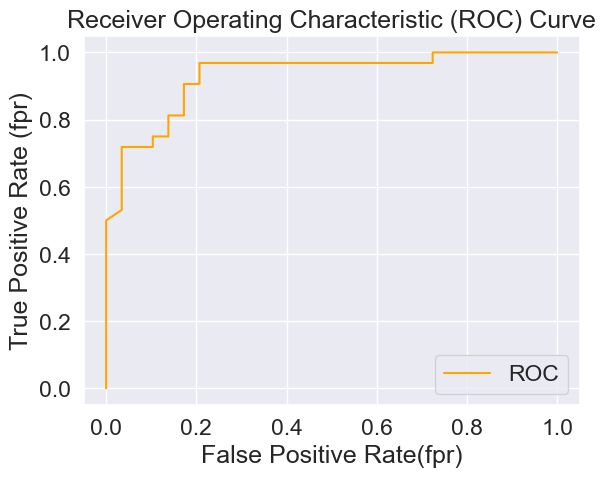

In [34]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    """
        False Positive Rate (fpr) direction X-axis
        True Positive Rate (tpr) direction Y-axis
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Customize the plot
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate (fpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9294181034482759